In [2]:
# imports and whatnot
import sympy
import numpy as np
import matplotlib.pyplot as plt

# Section A
### (i.) Derivatives with Sympy

In [3]:
x = sympy.symbols('x', real=True)

f = x**4 # function of x

dfdx = sympy.diff(f,x) # derivative of f with resepct to x

print(f"The derivative of f is {dfdx}") 

The derivative of f is 4*x**3


### (ii.) First Principles

In [4]:
f_ = sympy.lambdify(x, f)
dfdx_ = sympy.lambdify(x, dfdx)


def dfdx_fp(f, x, delta = 0.01):
    # The derivative from first principles
    return (f(x + delta) - f(x))/delta


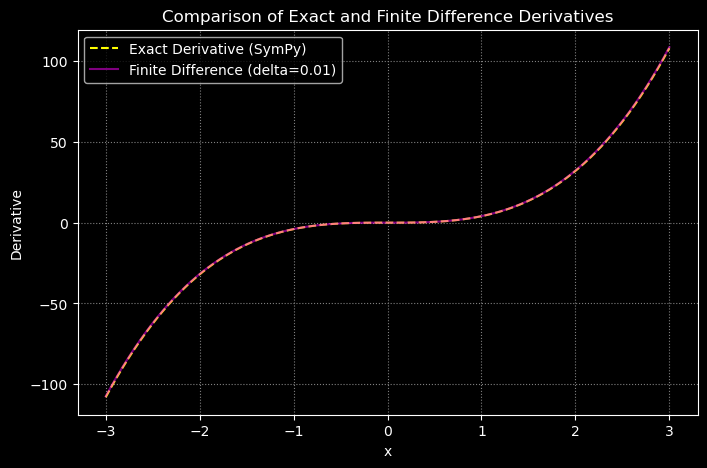

In [5]:
x_vals = np.linspace(-3, 3, 100)

exact_derivatives = dfdx_(x_vals)  
finite_diff_values = dfdx_fp(f_, x_vals)  

plt.style.use("dark_background")

plt.figure(figsize=(8, 5))
plt.plot(x_vals, exact_derivatives, label="Exact Derivative (SymPy)", linestyle="dashed", color="yellow")
plt.plot(x_vals, finite_diff_values, label=f"Finite Difference (delta={0.01})", linestyle="solid", color="magenta", alpha=0.5)

plt.xlabel("x", color="white")
plt.ylabel("Derivative", color="white")
plt.title("Comparison of Exact and Finite Difference Derivatives", color="white")
plt.legend()
plt.grid(color="gray", linestyle="dotted")  
plt.gca().spines["bottom"].set_color("white")
plt.gca().spines["left"].set_color("white")
plt.tick_params(axis="both", colors="white")  

plt.show()

### (iii.) Varying delta

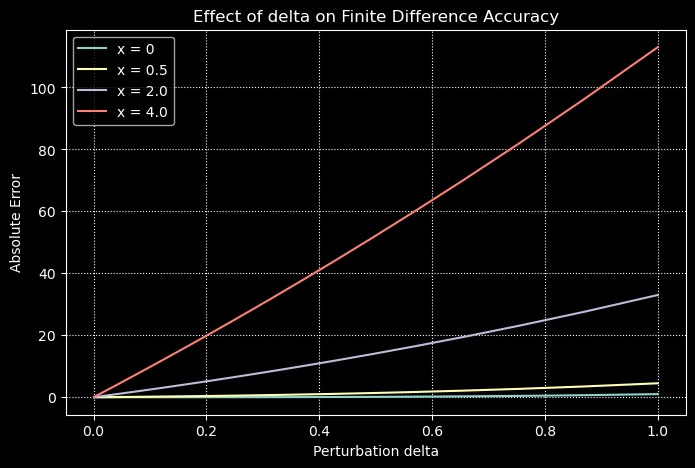

In [6]:
delta_vals = np.logspace(-3, 0, 50)  
x_values  = [0, 0.5, 2.0, 4.0]

#exact_derivative = dfdx_(x_val)


#finite_diff_values = np.array([dfdx_fp(f_, x_val, delta) for delta in delta_vals])


# Plot error vs delta
plt.figure(figsize=(8, 5))

for x_val in x_values:
    exact_derivative = dfdx_(x_val)
    finite_diff_values = np.array([dfdx_fp(f_, x_val, delta) for delta in delta_vals])
    errors = (finite_diff_values - exact_derivative)
    plt.plot(delta_vals, errors, linestyle="-", label=f"x = {x_val}")

#plt.xscale("log")  # Log scale for better visualization
#plt.yscale("log")
plt.xlabel("Perturbation delta")
plt.ylabel("Absolute Error")
plt.title("Effect of delta on Finite Difference Accuracy")
plt.legend()
plt.grid(True, linestyle="dotted")
plt.show()

# Section (b.)

### (i.) Defining a simple gradient descent function

In [7]:
# Taken from the lectures but modified slightly
def Gradient_Descent(f, df, x0, alpha=0.15, num_iters=50):
    x = x0
    X = [x0] # For storing the trajectory of x
    F = [f(x0)]

    for _ in range(num_iters):
        step = alpha*df(x)
        x = x - step
        X.append(x)
        F.append(f(x))
    
    return np.array(X), np.array(F)

### (ii.) Using gradient descent on $f(x) = x^4$

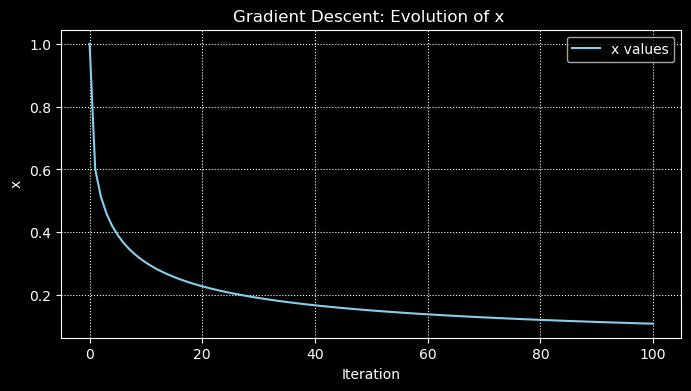

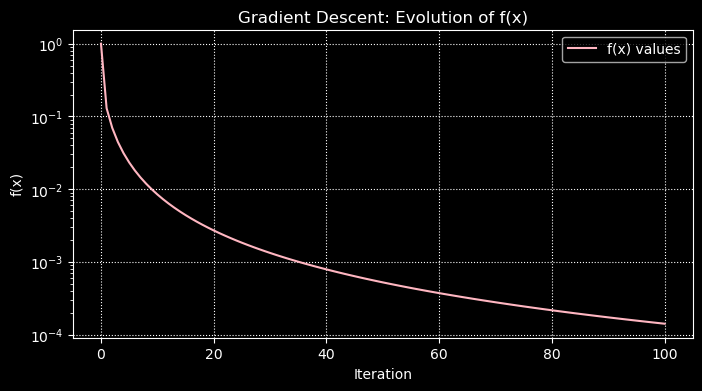

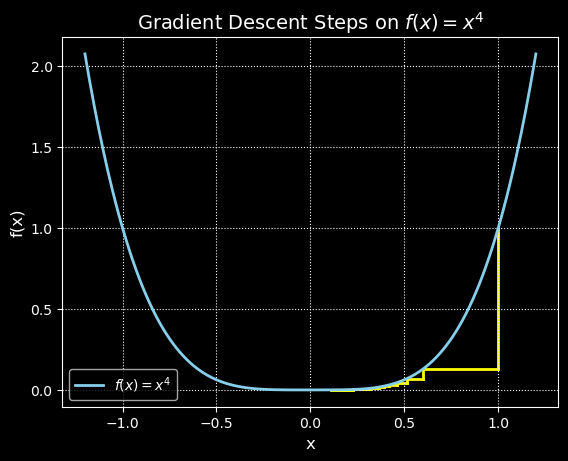

In [8]:
num_iters = 100
x_0 = 1
a = 0.1

X_traj, F_traj = Gradient_Descent(f_, dfdx_, x_0, a, num_iters)

plt.figure(figsize=(8, 4))
plt.plot(range(num_iters + 1), X_traj, linestyle='-', color='skyblue', label="x values")
plt.xlabel("Iteration")
plt.ylabel("x")
#plt.yscale("log")
plt.title("Gradient Descent: Evolution of x ")
plt.legend()
plt.grid(True, linestyle="dotted")
plt.show()


plt.figure(figsize=(8, 4))
plt.plot(range(num_iters + 1), F_traj, linestyle='-', color='lightpink', label="f(x) values")
plt.xlabel("Iteration")
plt.ylabel("f(x)")
plt.yscale("log")
#plt.xscale("log")
plt.title("Gradient Descent: Evolution of f(x)")
plt.legend()
plt.grid(True, linestyle="dotted")
plt.show()

x_vals = np.linspace(-1.2, 1.2, 400)
y_vals = f_(x_vals)

for i in range(len(X_traj) - 1):

    plt.plot([X_traj[i], X_traj[i]], [F_traj[i], F_traj[i+1]],
             color='yellow', lw=2, zorder=1)
    plt.plot([X_traj[i], X_traj[i+1]], [F_traj[i+1], F_traj[i+1]],
             color='yellow', lw=2, zorder=1)

plt.plot(x_vals, y_vals, color='skyblue', lw=2, label=r'$f(x)=x^4$', zorder=3)


plt.xlabel("x", fontsize=12)
plt.ylabel("f(x)", fontsize=12)
plt.title("Gradient Descent Steps on $f(x)=x^4$", fontsize=14)
plt.legend()
plt.grid(True, linestyle="dotted", zorder=0)
plt.show()

### (iii.) Varying $\alpha$ and $x_0$

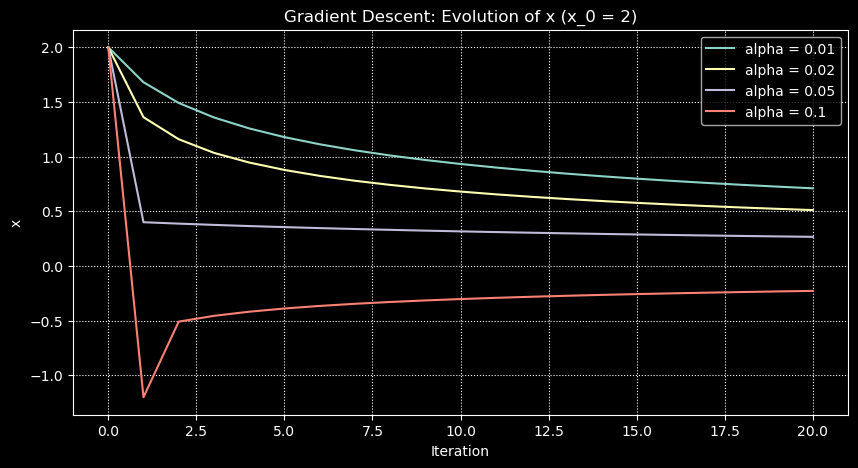

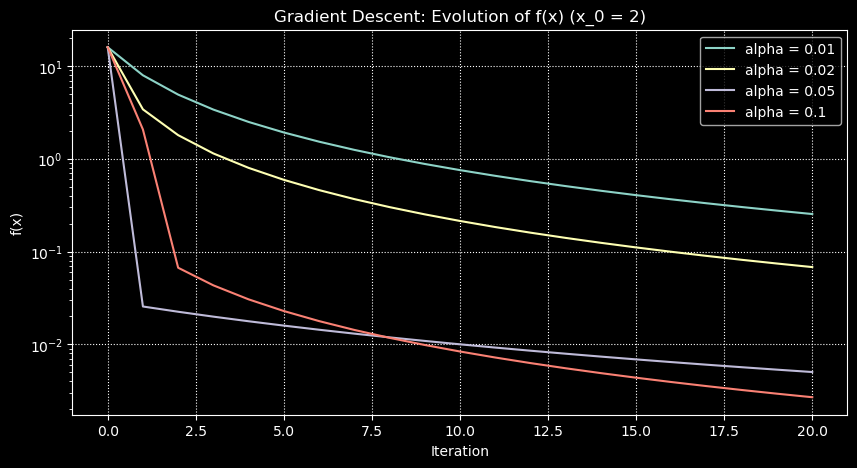

In [ ]:
num_iters = 20
starting_x = 1  
a_ = 0.01
x0 = 2
h = np.sqrt(1/(2*a))
x0s = []
alphas = [0.01, 0.02, 0.05, 0.1]


plt.figure(figsize=(10, 5))
for a in alphas:
    X, _ = Gradient_Descent(f_, dfdx_, x0, a, num_iters)
    plt.plot(range(num_iters + 1), X, label=f'alpha = {a}')
plt.xlabel("Iteration")
plt.ylabel("x")
#plt.yscale("log")
#plt.ylim([-.1,3])
plt.title(f"Gradient Descent: Evolution of x (x_0 = {x0})")
plt.legend()
plt.grid(True, linestyle="dotted")
plt.show()


plt.figure(figsize=(10, 5))
for a in alphas:
    _, F = Gradient_Descent(f_, dfdx_, x0, a, num_iters)
    plt.plot(range(num_iters + 1), F, label=f'alpha = {a}')
plt.xlabel("Iteration")
plt.ylabel("f(x)")
plt.yscale("log")
plt.title(f"Gradient Descent: Evolution of f(x) (x_0 = {x0})")
plt.legend()
plt.grid(True, linestyle="dotted")
plt.show()

# Section (C.)

### (i) A quadratic curve.

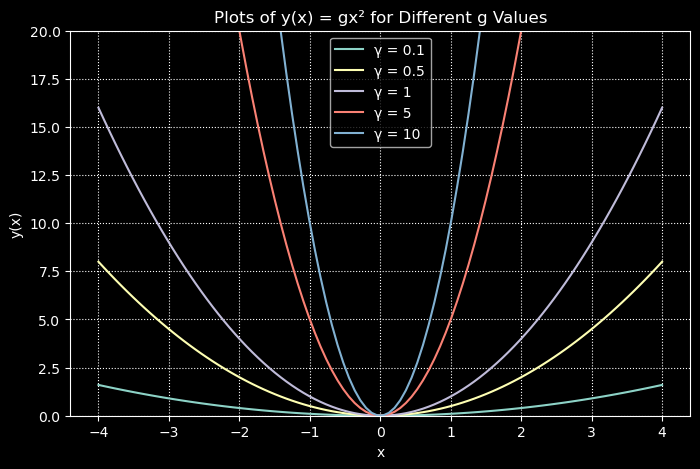

In [ ]:
gamma_values = [0.1, 0.5, 1, 5, 10]




x_vals = np.linspace(-4, 4, 100) 

# Create plot
plt.figure(figsize=(8, 5))


for gamma in gamma_values:
    y_vals = gamma * x_vals**2  # Compute y(x)
    plt.plot(x_vals, y_vals, label=f"g = {gamma}")


plt.xlabel("x")
plt.ylabel("y(x)")
plt.ylim([0,20])
plt.title("Plots of y(x) = gx² for Different g Values")
plt.legend()
plt.grid(True, linestyle="dotted")
plt.show()

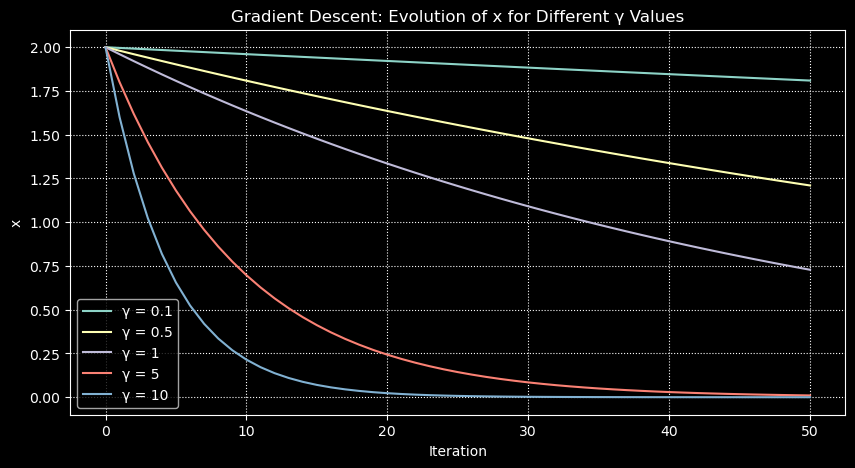

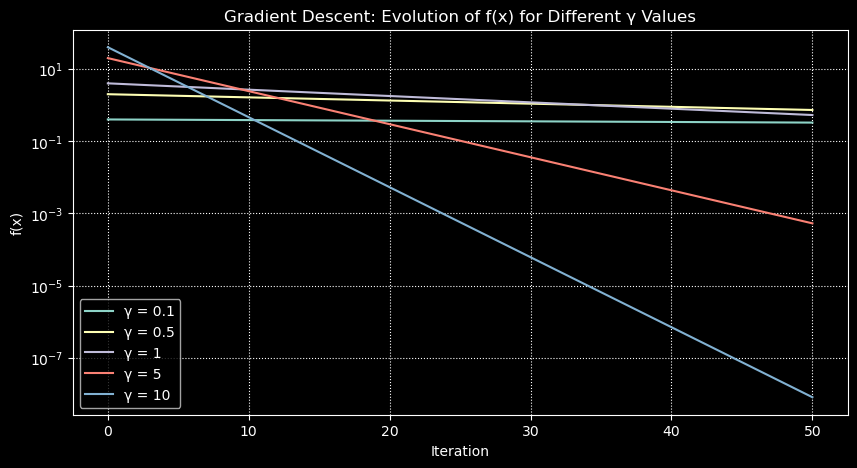

In [ ]:
alpha = 0.01
num_iters = 50

plt.figure(figsize=(10, 5))
for gamma in gamma_values:
    y_ = lambda x: gamma * x**2  
    dydx_ = lambda x: 2 * gamma * x  


    X, _ = Gradient_Descent(y_, dydx_, x0, alpha, num_iters)


    plt.plot(range(len(X)), X, label=f"γ = {gamma}")

plt.xlabel("Iteration")
plt.ylabel("x")
plt.title("Gradient Descent: Evolution of x for Different γ Values")
plt.legend()
plt.grid(True, linestyle="dotted")
plt.show()


plt.figure(figsize=(10, 5))

for gamma in gamma_values:
    y_ = lambda x: gamma * x**2  
    dydx_ = lambda x: 2 * gamma * x  

  
    _, F = Gradient_Descent(y_, dydx_, x0, alpha, num_iters)

    
    plt.plot(range(len(F)), F, label=f"γ = {gamma}")

plt.xlabel("Iteration")
plt.ylabel("f(x)")
plt.yscale("log")  
plt.title("Gradient Descent: Evolution of f(x) for Different γ Values")
plt.legend()
plt.grid(True, linestyle="dotted")
plt.show()

### (ii.) The absolute value (Non-Convex).

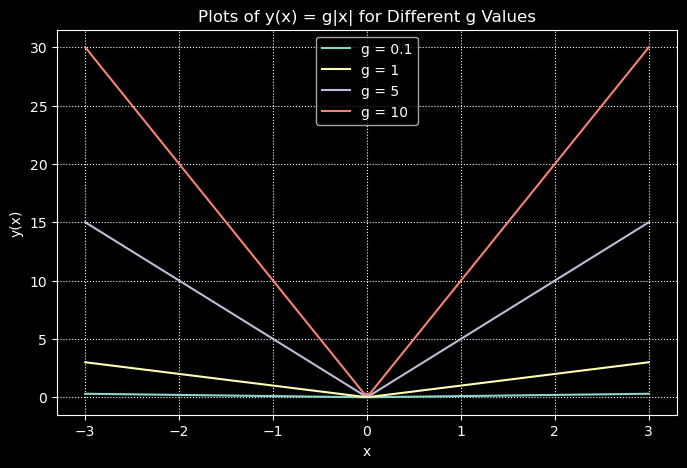

In [ ]:
gamma_values = [0.1, 1, 5, 10]



x_vals = np.linspace(-3, 3, 100) 


plt.figure(figsize=(8, 5))

for gamma in gamma_values:
    y_vals = gamma * abs(x_vals)  
    plt.plot(x_vals, y_vals, label=f"g = {gamma}")

plt.xlabel("x")
plt.ylabel("y(x)")
#plt.ylim([0,20])
plt.title("Plots of y(x) = g|x| for Different g Values")
plt.legend()
plt.grid(True, linestyle="dotted")
plt.show()

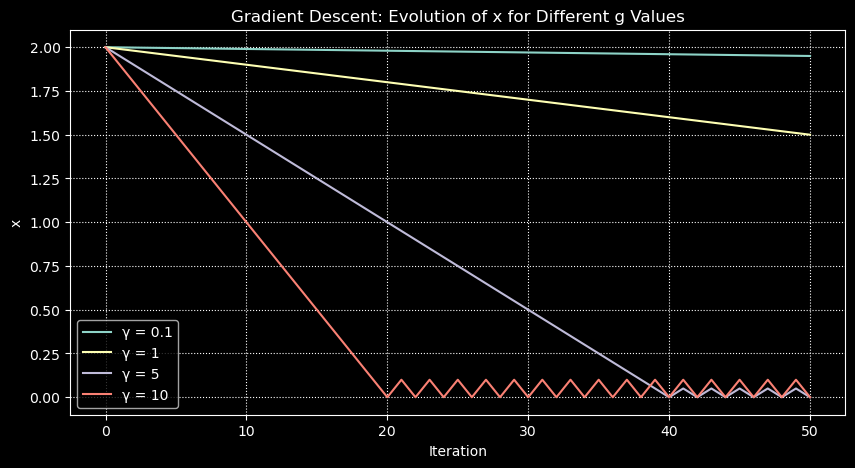

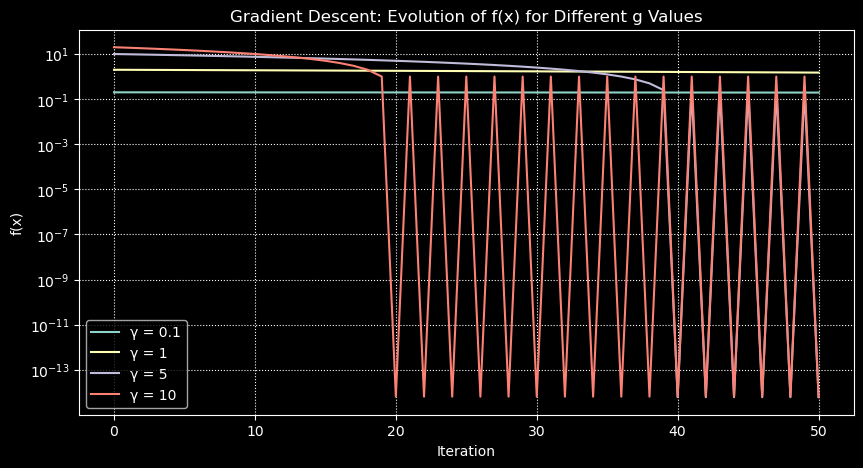

In [ ]:
alpha = 0.01
num_iters = 50

# Gonna need this for abs x
def abs_derv(x, gamma):
    if x > 0:
        return gamma
    elif x < 0:
        return -gamma
    else:
        return 0 

plt.figure(figsize=(10, 5))
for gamma in gamma_values:
    y_ = lambda x: gamma * abs(x)  
    dydx_ = lambda x: abs_derv(x, gamma)  

    X, _ = Gradient_Descent(y_, dydx_, x0, alpha, num_iters)

    plt.plot(range(len(X)), X, label=f"γ = {gamma}")

plt.xlabel("Iteration")
plt.ylabel("x")
plt.title("Gradient Descent: Evolution of x for Different g Values")
plt.legend()
plt.grid(True, linestyle="dotted")
plt.show()


plt.figure(figsize=(10, 5))

for gamma in gamma_values:
    y_ = lambda x: gamma * abs(x)  
    dydx_ = lambda x: abs_derv(x, gamma) 


    _, F = Gradient_Descent(y_, dydx_, x0, alpha, num_iters)
    plt.plot(range(len(F)), F, label=f"γ = {gamma}")

plt.xlabel("Iteration")
plt.ylabel("f(x)")
plt.yscale("log")  
plt.title("Gradient Descent: Evolution of f(x) for Different g Values")
plt.legend()
plt.grid(True, linestyle="dotted")
plt.show()